In [99]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np

In [100]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [101]:
import seaborn as sns

In [102]:
mtcars = pd.read_csv("mtcars.csv")

mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [103]:
mtcars.shape

(32, 12)

In [104]:
x = mtcars.iloc[:,2:]
x.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [105]:
y = mtcars.iloc[:,1]
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

In [107]:
model = linear_model.LinearRegression()

In [108]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
model.score(x_train, y_train)

0.8786620332584134

In [110]:
model.coef_

array([-0.8055518 ,  0.04625053, -0.03311756,  1.46586723, -6.81707009,
        2.03455898, -1.17437428,  2.38310837,  0.68987984,  0.83898623])

In [111]:
model.intercept_

-5.810427960535371

In [112]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
cyl,-0.805552
disp,0.046251
hp,-0.033118
drat,1.465867
wt,-6.817070
qsec,2.034559
vs,-1.174374
am,2.383108
gear,0.689880
carb,0.838986


In [113]:
ypred=model.predict(x_test)
#print(ypred)

In [114]:
error = y_test - ypred 

error.mean()

0.27519707182868763

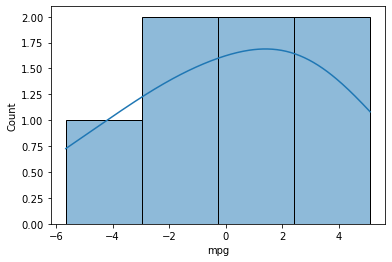

In [115]:
sns.histplot(error, kde = True)
plt.show()

In [116]:
##### Here our Rsqure is 0.87

##### so we have to normalize our data

In [117]:
from sklearn.preprocessing import MinMaxScaler

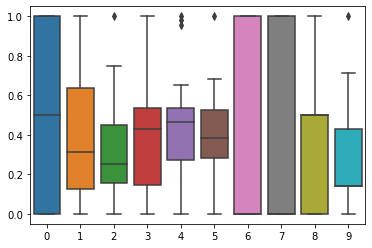

In [118]:
m = MinMaxScaler()

m.fit(x)

x_trans = m.transform(x)

sns.boxplot(data = x_trans)
plt.show()

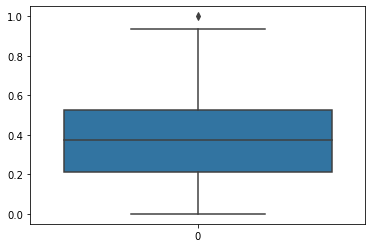

In [119]:
m = MinMaxScaler()
y = np.array(y).reshape(-1,1)
m.fit(y)

y_trans = m.transform(y)

sns.boxplot(data = y_trans)
plt.show()

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x_trans, y_trans, test_size = 0.2)

In [121]:
model = linear_model.LinearRegression()

In [122]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
model.score(x_train, y_train)

0.86520726709141

In [124]:
model.coef_

array([[-0.02080715,  0.38433385, -0.41794915,  0.1211345 , -0.61886212,
         0.29483587,  0.01864452,  0.14282667,  0.01938927, -0.03904922]])

In [125]:
model.intercept_

array([0.44740021])

In [126]:
pd.DataFrame(model.coef_.flatten(), x.columns, columns = ['Coeff'])

,Coeff
cyl,-0.020807
disp,0.384334
hp,-0.417949
drat,0.121134
wt,-0.618862
qsec,0.294836
vs,0.018645
am,0.142827
gear,0.019389
carb,-0.039049


In [127]:
ypred = model.predict(x_test)

In [128]:
error = y_test - ypred 

error.mean()

0.026791582279111995

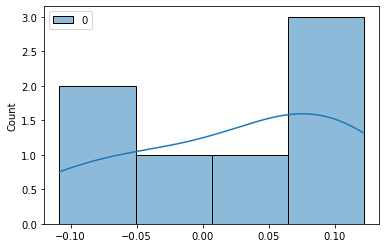

In [129]:
sns.histplot(error, kde = True)
plt.show()

###### We have to check outliers

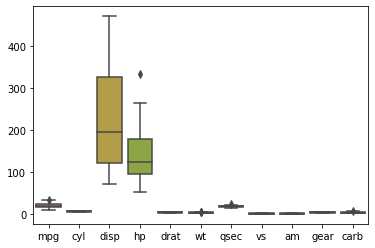

In [130]:
sns.boxplot(data = mtcars)
plt.show()

In [131]:
Q1 = mtcars.quantile(0.25)

Q3 = mtcars.quantile(0.75)

IQR = Q3 - Q1 

print(IQR)

mpg       7.37500
cyl       4.00000
disp    205.17500
hp       83.50000
drat      0.84000
wt        1.02875
qsec      2.00750
vs        1.00000
am        1.00000
gear      1.00000
carb      2.00000
dtype: float64


In [132]:
mtcars = mtcars[-((mtcars < (Q1 - 1.5 * IQR))|(mtcars > (Q3 + 1.5 * IQR ))).any(axis =1)]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [133]:
mtcars.shape

(26, 12)

In [134]:
## now again performa regression


In [135]:
x = mtcars.iloc[:,2:]
x.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [136]:
y = mtcars.iloc[:,1]
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [138]:
model = linear_model.LinearRegression()

In [139]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
model.score(x_train, y_train)

0.8674364049187762

In [141]:
model.coef_

array([-0.73639368,  0.04945173, -0.06861568, -3.26615086, -8.00274179,
        2.89145838, -3.24200341,  5.45262757,  0.85179548,  3.62751839])

In [142]:
model.intercept_

-3.509681471665349

In [143]:
pd.DataFrame(model.coef_.flatten(), x.columns, columns = ['Coeff'])

,Coeff
cyl,-0.736394
disp,0.049452
hp,-0.068616
drat,-3.266151
wt,-8.002742
qsec,2.891458
vs,-3.242003
am,5.452628
gear,0.851795
carb,3.627518


In [144]:
ypred = model.predict(x_test)

In [145]:
error = y_test - ypred 

error.mean()

-4.587687374603402

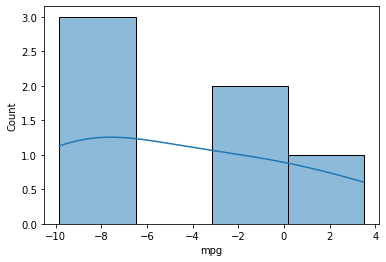

In [146]:
sns.histplot(error, kde = True)
plt.show()